In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def compound_interest(principal, rate, time, times_compounded):
    return principal * (1 + rate/times_compounded) ** (time * times_compounded)

In [3]:
years = np.linspace(0, 40, 401)

In [4]:
amount = compound_interest(500., 0.07, years, 12)

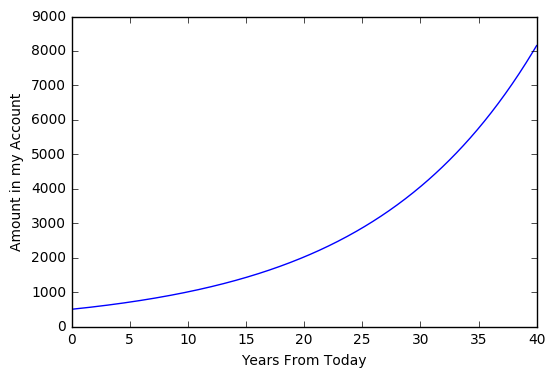

In [5]:
plt.plot(years, amount)
plt.xlabel("Years From Today")
plt.ylabel("Amount in my Account")
plt.show()

In [6]:
sample_data = amount + ((np.random.random(len(amount)) - 0.5) * 500)

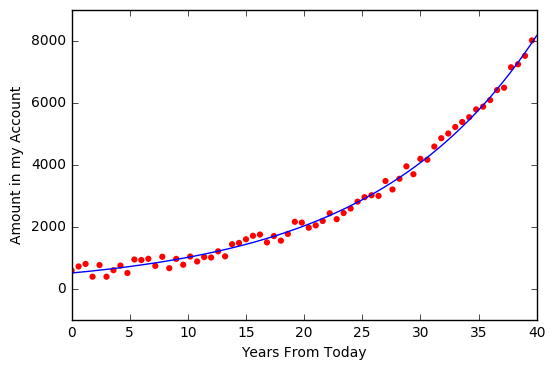

In [7]:
plt.plot(years, amount)
plt.scatter(years[::6], sample_data[::6], edgecolor="None", c="red")
plt.xlim(0, 40)
plt.xlabel("Years From Today")
plt.ylabel("Amount in my Account")
plt.show()

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv("data/goog_1yr.csv")
data.Date = pd.to_datetime(data.Date)

In [10]:
data.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Adj Close', 'Years Since 2009', 'Daily Avg', 'Daily Range'],
      dtype='object')

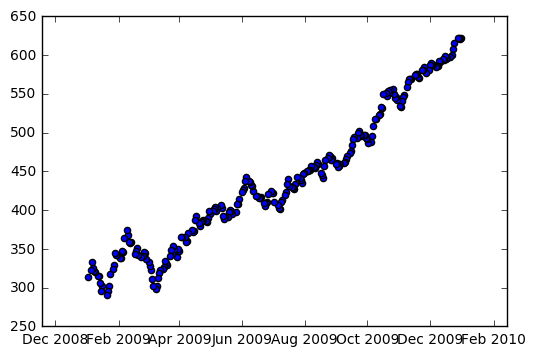

In [11]:
plt.scatter(np.array(data.Date), data["Daily Avg"])
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
data.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Adj Close', 'Years Since 2009', 'Daily Avg', 'Daily Range'],
      dtype='object')

In [14]:
regress = LinearRegression()

In [15]:
regress.fit(data["Years Since 2009"].reshape(-1, 1), data["Daily Avg"])

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
slope = regress.coef_[0]
intercept = regress.intercept_

In [17]:
print(slope, intercept)

302.015343831 287.59810766


/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


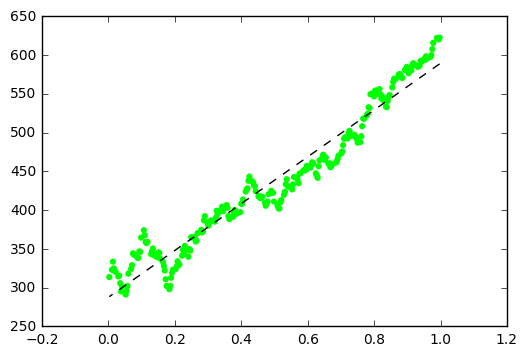

In [18]:
plt.scatter(data["Years Since 2009"], data["Daily Avg"], 
            edgecolor="None", c="#00FF00")
plt.plot(data["Years Since 2009"],
         regress.predict(data["Years Since 2009"].reshape(-1, 1)),
         color="black", linestyle="--")
plt.show()

In [19]:
regress.predict([[2.0]])

array([ 891.62879532])

In [20]:
regress2 = LinearRegression()

In [21]:
regress2.fit(data[["Years Since 2009", "Volume", "Daily Range"]], data["Daily Avg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

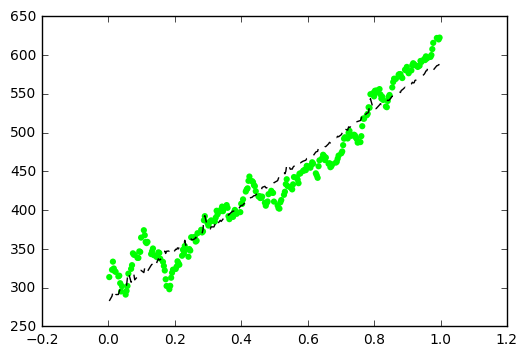

In [22]:
plt.scatter(data["Years Since 2009"], data["Daily Avg"], 
            edgecolor="None", c="#00FF00")
plt.plot(data["Years Since 2009"],
         regress2.predict(data[["Years Since 2009", "Volume", "Daily Range"]]),
         color="black", linestyle="--")
plt.show()

## Chi-Squared by Example

In [29]:
chi_sq = sum((data["Daily Avg"] - regress.predict(data["Years Since 2009"].reshape(-1, 1)))**2/(data["Daily Range"]**2))
# chisq = (regress.predict(data["Years Since 2009"].reshape(-1,1)) - data["Daily Avg"])**2 / data["Daily Range"]**2

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [30]:
chisq_dof = chi_sq / (len(data) - 2)
chisq_dof

7.681517498359919

In [32]:
AIC = -2 * chi_sq + 2*3 + (2*3*4)/(len(data)-3-1)
AIC

-3834.6619749864112

In [36]:
def AIC(chi, k, N):
    return -2 * chi_sq + 2*3 + (2*3*4)/(N-3-1)

In [38]:
AIC(chi_sq - 1, 3, len(data))

-3834.6619749864112

In [39]:
AIC(chisq_dof - 1, 3, len(data))

-3834.6619749864112